In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
%matplotlib inline

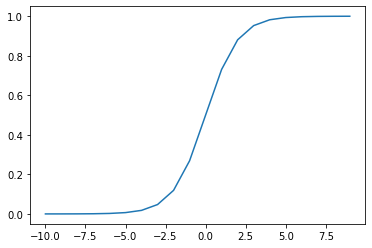

In [2]:
def logistic(z):
    return 1/(1 + np.exp(-z))

x, fz = [], []
for z in range(-10, 10):
    x.append(z)
    fz.append(logistic(z))
    
plt.plot(x, fz)

1. What is the domain of the logistic function? 

[Type your answer here]

2. What is the range of the logistic function?

[Type your answer here]

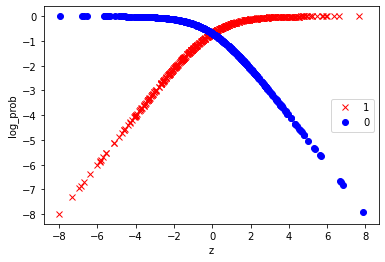

In [25]:
def log_prob(z, y_i):
    '''
    Returns the log_prob for one point
    '''
    fz = logistic(z)
    return y_i * np.log(fz) + (1 - y_i) * np.log(1 - fz)


out = []

dim_ = 10

for _ in range(1000):
    # generate some random weights 
    w = np.random.uniform(low=-2, high=2, size=dim_)
    
    # generate some random binary features 
    x = (np.random.rand(dim_) > .5).astype(int) 
    
    # get the z score
    z = w.dot(x)

    y = 1 if random.random() < .5 else 0
    loss = log_prob(z=z, y_i=y)
    out.append({"z": z, "loss": loss, "label": y})

df = pd.DataFrame(out)
    
fig, ax = plt.subplots()

ax.plot(df[df["label"] == 1]["z"], df[df["label"] == 1]["loss"], 'x', color="red", label='1')
ax.plot(df[df["label"] == 0]["z"], df[df["label"] == 0]["loss"], 'o', color="blue", label='0')

plt.xlabel("z")

plt.ylabel("log_prob")

plt.legend()

plt.show()

In [ ]:
3. What is the log_prob when y=1 and z=-.25? Why does that make sense?

[Type your answer here]

4. What is the log_prob when y=0 and z=-.25? Why does that make sense?

[Type your answer here]

5. Why is the log_prob always negative? 

[Type your answer here]

In [ ]:
def neg_log_likelihood(X, w, y):
    L = 0
    for _x,_y in zip(X, y):
        z = w.dot(_x)
        L += loss_one_point(z=z, y_i=_y)
    return -1 * L

def fast_logistic(X, w):
    return 1/(1 + np.exp(-1 * X.dot(w)))

def grad(X, w, y):
    grad = np.zeros_like(w)
    for _x,_y in zip(X, y):
        fz = logistic(w.dot(_x))
        grad += _x * (_y - fz)
    return grad    

def grad_ascent(X, y, eta = .0001, tolerance=1e-4):

    w = np.random.rand(dim_)
    last = 0
    for i in range(100000):
        this_ll = log_likelihood(X, w, y)
        if (i % 1000 == 0): 
            print(i, this_ll, accuracy(X, w))
        if accuracy(X, w) == 1: break
        if(abs(this_ll - last) < tolerance): break
        last = this_ll
        w += eta * grad(X, w, y)
    return w

def preds(X, w, threshold=.5):
    return 1/(1 + np.exp(-1 * X.dot(w))) > threshold

def accuracy(X, w):
    return np.mean(preds(X, w) == y)

N = 100
dim_ = 50
w = np.random.uniform(low=-2, high=2, size=dim_)
X = (np.random.rand(dim_ * N) > .5).astype(int)
X = X.reshape(N, dim_)
y = (np.random.rand(N) > .5).astype(int)

w = grad_ascent(X, y, eta=.00001, tolerance=1e-10)

0 668.6123106587274 0.48
1000 301.64535147186973 0.48
2000 81.93541207169974 0.47
3000 71.09410451182991 0.61
4000 66.94196794372782 0.64
5000 63.45079942551603 0.66
6000 60.49220612421758 0.67
7000 57.974064511130926 0.69
8000 55.81781416140057 0.71


In [107]:
fast_logistic(X, w)

(100,)

Is stochastic grad ascent faster?
What is the advantage of stoch grad? 
